In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_h = pd.read_csv("data/hubbard_h.csv", index_col="d")
df_u = pd.read_csv("data/hubbard_u.csv", index_col="d")
df_toeplitz = pd.read_csv("data/hubbard_toeplitz.csv", index_col="d")
df_tebd = pd.read_csv("data/hubbard_tebd.csv", index_col="d")
df_tebd_toep = pd.read_csv("data/hubbard_tebd_toep.csv", index_col="d")
df_svsim = pd.read_csv("data/hubbard_svsim.csv", index_col="d")
dfs = [df_h, df_u, df_toeplitz, df_tebd, df_tebd_toep, df_svsim]

In [3]:
ground_energy = np.load("data/ground_energy.npy")
print(f"Ground state energy = {ground_energy:4.5e}")

Ground state energy = -8.28427e-01


In [4]:
for df in dfs:
    df["err"] = np.abs(df["energy"] - ground_energy)

In [5]:
all_dmax = [np.max(df.index) for df in dfs]
d_max = max(all_dmax)

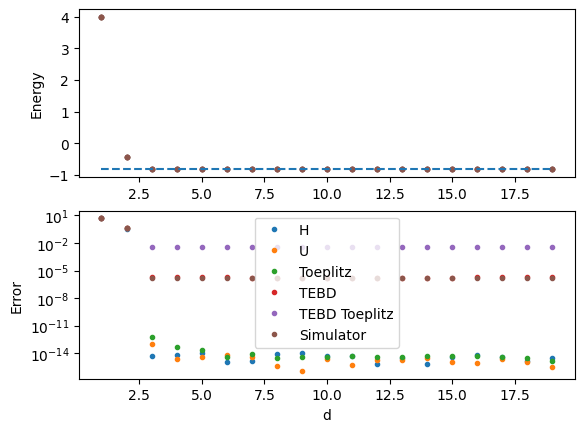

In [6]:
labels = ["H", "U", "Toeplitz", "TEBD", "TEBD Toeplitz", "Simulator"]
fig, ax = plt.subplots(2, 1)
for label, df in zip(labels, dfs):
    ax[0].plot(df.index, df["energy"], '.', label=label)
    ax[1].plot(df.index, df["err"], '.', label=label)
ax[0].hlines(ground_energy, 1., d_max, linestyles='--', label="Ground state")
ax[1].set_xlabel("d")
ax[0].set_ylabel("Energy")
ax[1].set_ylabel("Error")
ax[1].set_yscale("log")
plt.legend()